<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [0]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-05-20 16:43:40.863186


In [0]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [0]:
def state_chart(deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')

    plt.show()

In [0]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

In [0]:
# All States
states = pop['State'].tolist()
states.sort()

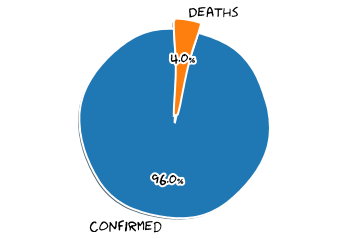

Alabama State Total Population
4887871
Alabama State Confirmed
12701 (0.25984728320366884% of population)
Alabama State Deaths
508 (3.9996850641681756% of confirmed)



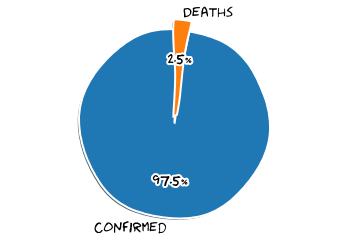

Alaska State Total Population
737438
Alaska State Confirmed
400 (0.05424184812824943% of population)
Alaska State Deaths
10 (2.5% of confirmed)



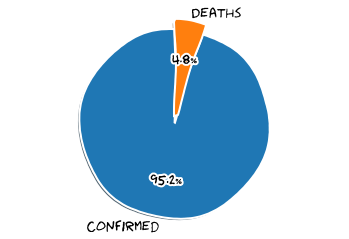

Arizona State Total Population
7171646
Arizona State Confirmed
14576 (0.2032448338916896% of population)
Arizona State Deaths
704 (4.829857299670691% of confirmed)



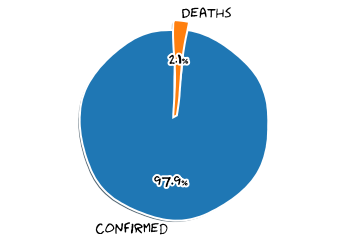

Arkansas State Total Population
3013825
Arkansas State Confirmed
4923 (0.16334724146226143% of population)
Arkansas State Deaths
102 (2.071907373552712% of confirmed)



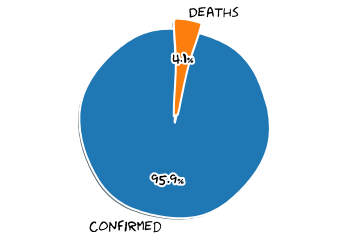

California State Total Population
39557045
California State Confirmed
83845 (0.211959715393301% of population)
California State Deaths
3419 (4.077762538016578% of confirmed)



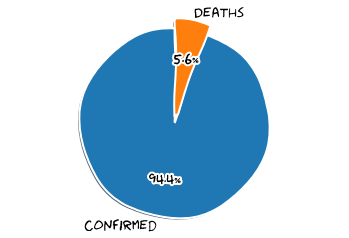

Colorado State Total Population
5695564
Colorado State Confirmed
22482 (0.39472824815944485% of population)
Colorado State Deaths
1257 (5.59113957832933% of confirmed)



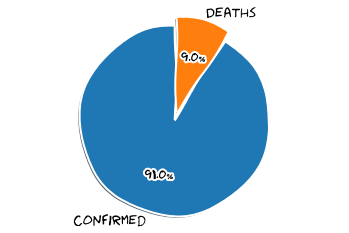

Connecticut State Total Population
3572665
Connecticut State Confirmed
38430 (1.0756676038755382% of population)
Connecticut State Deaths
3472 (9.034608378870674% of confirmed)



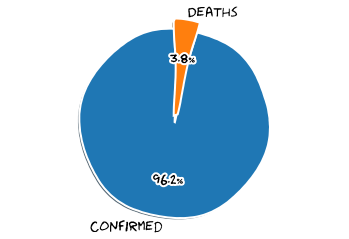

Delaware State Total Population
967171
Delaware State Confirmed
8037 (0.8309802506485409% of population)
Delaware State Deaths
304 (3.7825059101654848% of confirmed)



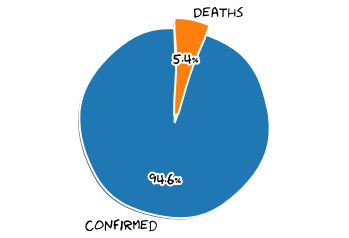

District of Columbia State Total Population
702455
District of Columbia State Confirmed
7551 (1.0749443024820096% of population)
District of Columbia State Deaths
407 (5.390014567606939% of confirmed)



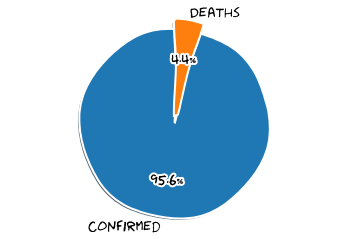

Florida State Total Population
21299325
Florida State Confirmed
47471 (0.2228756075603335% of population)
Florida State Deaths
2096 (4.415327252427798% of confirmed)



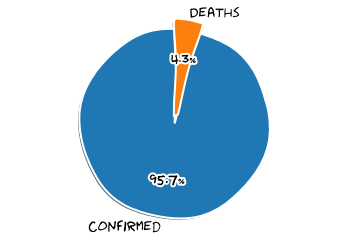

Georgia State Total Population
10519475
Georgia State Confirmed
38920 (0.3699804410391203% of population)
Georgia State Deaths
1684 (4.326824254881808% of confirmed)



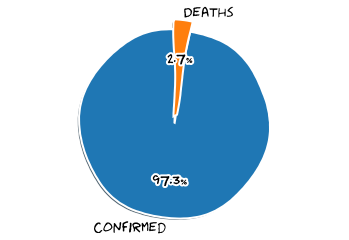

Hawaii State Total Population
1420491
Hawaii State Confirmed
641 (0.04512524190579173% of population)
Hawaii State Deaths
17 (2.65210608424337% of confirmed)



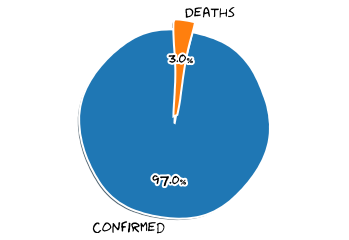

Idaho State Total Population
1754208
Idaho State Confirmed
2455 (0.1399491964464875% of population)
Idaho State Deaths
74 (3.0142566191446027% of confirmed)



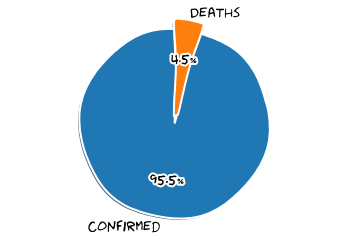

Illinois State Total Population
12741080
Illinois State Confirmed
98030 (0.7694010240890097% of population)
Illinois State Deaths
4379 (4.466999897990411% of confirmed)



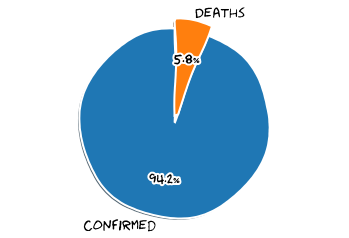

Indiana State Total Population
6691878
Indiana State Confirmed
28705 (0.4289528290862445% of population)
Indiana State Deaths
1678 (5.845671485803867% of confirmed)



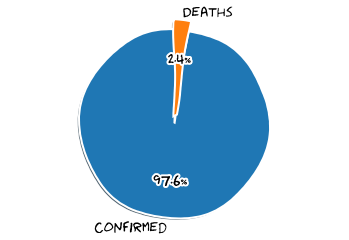

Iowa State Total Population
3156145
Iowa State Confirmed
15296 (0.48464186531353914% of population)
Iowa State Deaths
367 (2.3993200836820083% of confirmed)



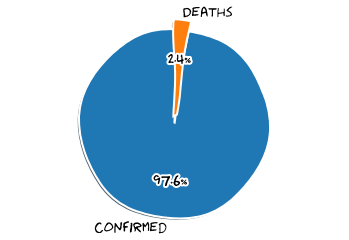

Kansas State Total Population
2911510
Kansas State Confirmed
8361 (0.2871705747189603% of population)
Kansas State Deaths
200 (2.392058366224136% of confirmed)



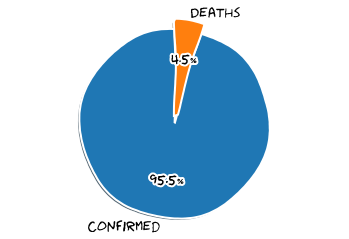

Kentucky State Total Population
4468402
Kentucky State Confirmed
8069 (0.18057909740439645% of population)
Kentucky State Deaths
366 (4.535878051803198% of confirmed)



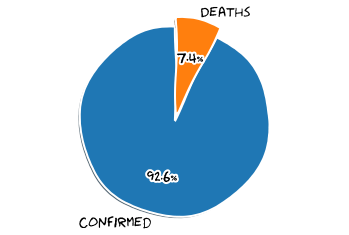

Louisiana State Total Population
4659978
Louisiana State Confirmed
35038 (0.7518919617217077% of population)
Louisiana State Deaths
2581 (7.366288030138707% of confirmed)



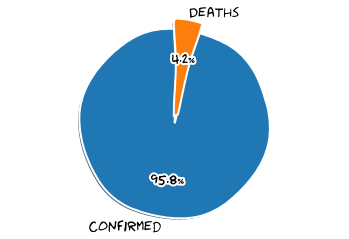

Maine State Total Population
1338404
Maine State Confirmed
1741 (0.1300803046016001% of population)
Maine State Deaths
73 (4.192992533026995% of confirmed)



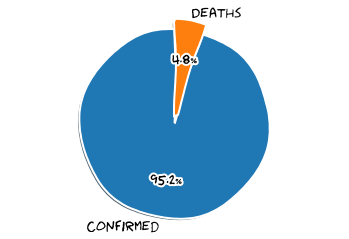

Maryland State Total Population
6042718
Maryland State Confirmed
42323 (0.7003967419959032% of population)
Maryland State Deaths
2049 (4.8413392245351226% of confirmed)



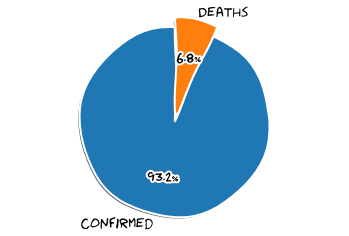

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
87925 (1.2738786137476894% of population)
Massachusetts State Deaths
5938 (6.7534830821723055% of confirmed)



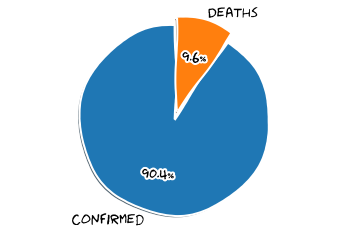

Michigan State Total Population
9995915
Michigan State Confirmed
52350 (0.523713937143323% of population)
Michigan State Deaths
5017 (9.583572110792742% of confirmed)



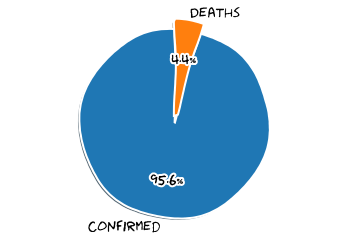

Minnesota State Total Population
5611179
Minnesota State Confirmed
17029 (0.3034834568635219% of population)
Minnesota State Deaths
757 (4.445357918844325% of confirmed)



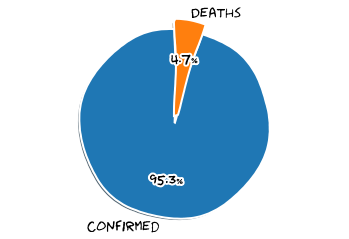

Mississippi State Total Population
2986530
Mississippi State Confirmed
11704 (0.39189293260071045% of population)
Mississippi State Deaths
554 (4.733424470266575% of confirmed)



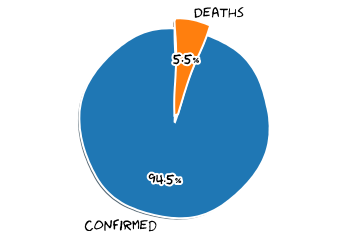

Missouri State Total Population
6126452
Missouri State Confirmed
11429 (0.18655169419429057% of population)
Missouri State Deaths
634 (5.547291976550879% of confirmed)



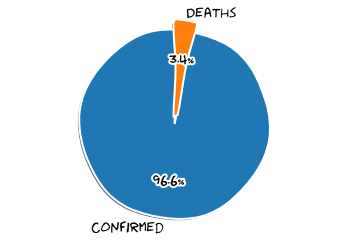

Montana State Total Population
1062305
Montana State Confirmed
471 (0.044337549008994594% of population)
Montana State Deaths
16 (3.397027600849257% of confirmed)



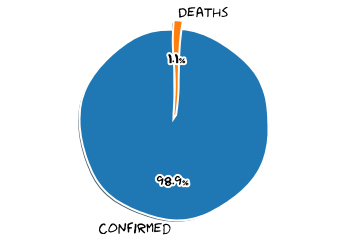

Nebraska State Total Population
1929268
Nebraska State Confirmed
10854 (0.5625967983711957% of population)
Nebraska State Deaths
123 (1.1332227750138197% of confirmed)



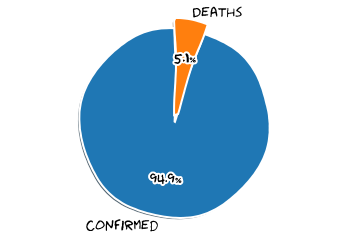

Nevada State Total Population
3034392
Nevada State Confirmed
7283 (0.2400151331798924% of population)
Nevada State Deaths
371 (5.094054647809968% of confirmed)



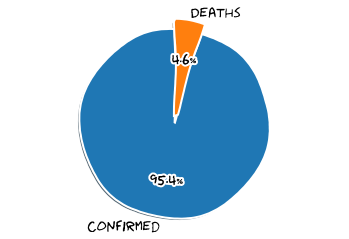

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
3721 (0.27431737657929695% of population)
New Hampshire State Deaths
172 (4.622413329750067% of confirmed)



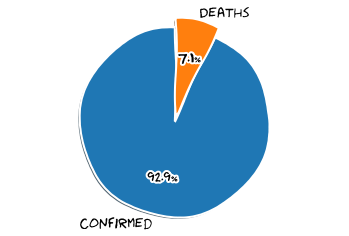

New Jersey State Total Population
8908520
New Jersey State Confirmed
149356 (1.6765523341699857% of population)
New Jersey State Deaths
10587 (7.088433005704492% of confirmed)



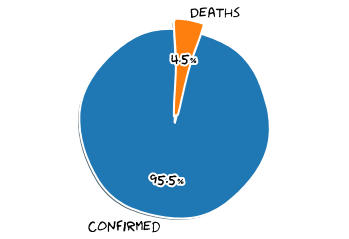

New Mexico State Total Population
2095428
New Mexico State Confirmed
6192 (0.2955004896374392% of population)
New Mexico State Deaths
276 (4.457364341085271% of confirmed)



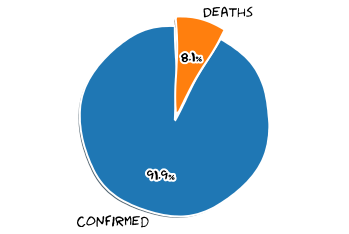

New York State Total Population
19542209
New York State Confirmed
352845 (1.80555330259747% of population)
New York State Deaths
28558 (8.093638849919936% of confirmed)



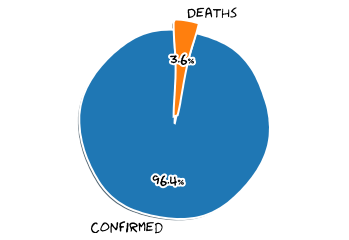

North Carolina State Total Population
10383620
North Carolina State Confirmed
19909 (0.19173467441990366% of population)
North Carolina State Deaths
722 (3.6265005776282084% of confirmed)



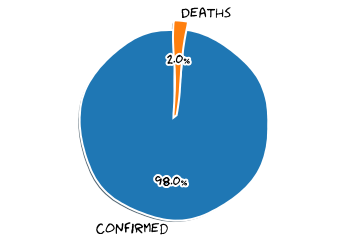

North Dakota State Total Population
760077
North Dakota State Confirmed
1994 (0.2623418416818296% of population)
North Dakota State Deaths
39 (1.9558676028084254% of confirmed)



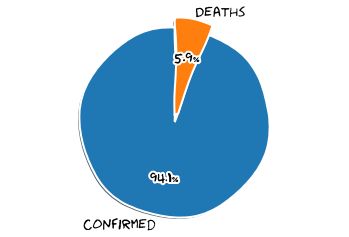

Ohio State Total Population
11689442
Ohio State Confirmed
28952 (0.24767649302678435% of population)
Ohio State Deaths
1720 (5.940867642995302% of confirmed)



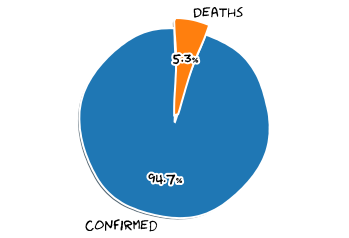

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
5489 (0.13920593526023697% of population)
Oklahoma State Deaths
293 (5.337948624521771% of confirmed)



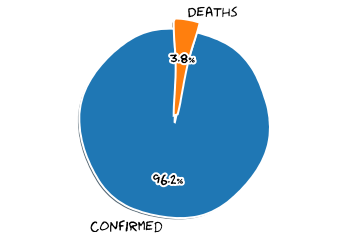

Oregon State Total Population
4190713
Oregon State Confirmed
3726 (0.08891088461557735% of population)
Oregon State Deaths
140 (3.7573805689747717% of confirmed)



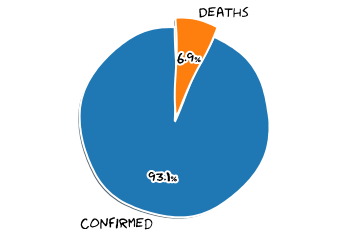

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
67311 (0.5255772987711466% of population)
Pennsylvania State Deaths
4628 (6.875547830220915% of confirmed)



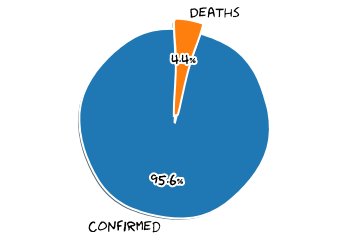

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
2866 (0.08969836499222417% of population)
Puerto Rico State Deaths
125 (4.361479413817166% of confirmed)



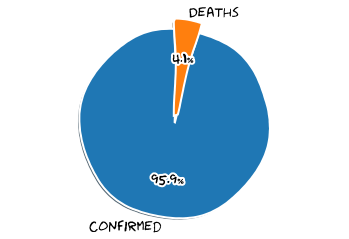

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
12951 (1.2248951353191813% of population)
Rhode Island State Deaths
532 (4.107790904177284% of confirmed)



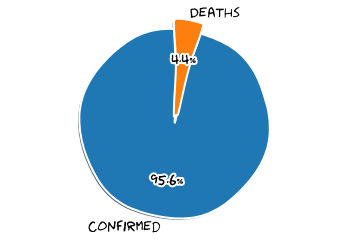

South Carolina State Total Population
5084127
South Carolina State Confirmed
9056 (0.17812300912231344% of population)
South Carolina State Deaths
399 (4.405918727915195% of confirmed)



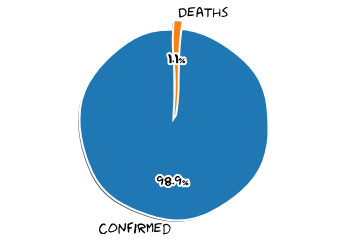

South Dakota State Total Population
882235
South Dakota State Confirmed
4085 (0.4630285581506062% of population)
South Dakota State Deaths
46 (1.1260709914320686% of confirmed)



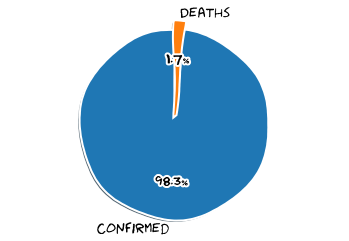

Tennessee State Total Population
6770010
Tennessee State Confirmed
18412 (0.27196414776344496% of population)
Tennessee State Deaths
305 (1.6565283510753857% of confirmed)



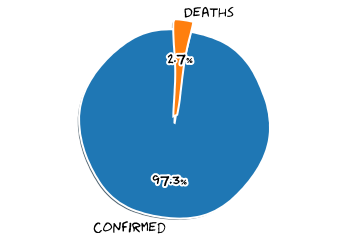

Texas State Total Population
28701845
Texas State Confirmed
50564 (0.1761698594637383% of population)
Texas State Deaths
1388 (2.7450359939878175% of confirmed)



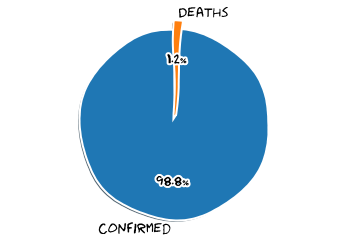

Utah State Total Population
3161105
Utah State Confirmed
7518 (0.2378282277874351% of population)
Utah State Deaths
88 (1.1705240755520085% of confirmed)



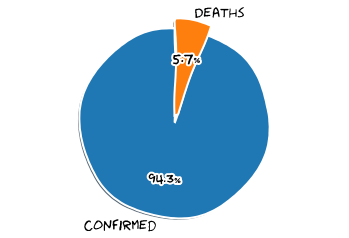

Vermont State Total Population
626299
Vermont State Confirmed
944 (0.15072672956527156% of population)
Vermont State Deaths
54 (5.720338983050848% of confirmed)



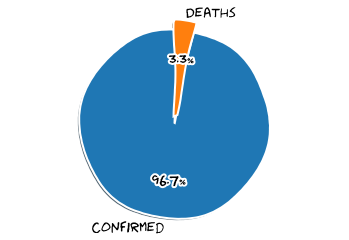

Virginia State Total Population
8517685
Virginia State Confirmed
32911 (0.3863843286057186% of population)
Virginia State Deaths
1074 (3.263346601440248% of confirmed)



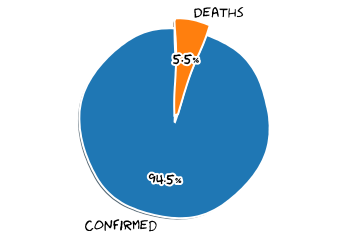

Washington State Total Population
7535591
Washington State Confirmed
18811 (0.24962872852308465% of population)
Washington State Deaths
1031 (5.4808356812503325% of confirmed)



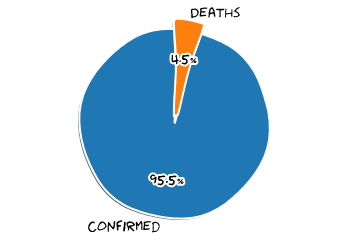

West Virginia State Total Population
1805832
West Virginia State Confirmed
1502 (0.08317495758187915% of population)
West Virginia State Deaths
68 (4.527296937416778% of confirmed)



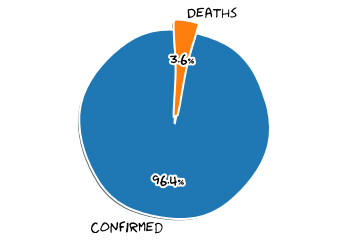

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
12885 (0.22163669539945174% of population)
Wisconsin State Deaths
467 (3.6243694218083045% of confirmed)



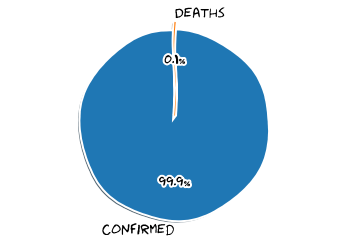

Wyoming State Total Population
577737
Wyoming State Confirmed
776 (0.1343171720004085% of population)
Wyoming State Deaths
1 (0.12886597938144329% of confirmed)



In [9]:
us = pd.DataFrame.from_dict(us_confirmed.json())

for i in states:
    state_details(i)

In [10]:
# quick summary
print('US Confirmed')
print(us['confirmed'].sum())
print('US Deaths')
print(us['deaths'].sum())
print('')

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[ny['admin2'] == 'New York City']
print('New York City Confirmed')
print(nyc['confirmed'].sum())
print('New York City Deaths')
print(nyc['deaths'].sum())
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

US Confirmed
1532212
US Deaths
91886

New York City Confirmed
193821
New York City Deaths
20887

Philippines Confirmed
13221
Philippines Deaths
842



In [11]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 4931057},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 324240},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-05-20T15:32:22.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 1710337},
 'source': 'https://github.com/mathdroid/covid19'}

In [0]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [13]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey
0,45001,Abbeville,South Carolina,US,2020-05-20 02:32:19,34.22333378,-82.46170658,36,0,0,36,"Abbeville, South Carolina, US"
1,22001,Acadia,Louisiana,US,2020-05-20 02:32:19,30.2950649,-92.41419698,262,12,0,250,"Acadia, Louisiana, US"
2,51001,Accomack,Virginia,US,2020-05-20 02:32:19,37.76707161,-75.63234615,701,9,0,692,"Accomack, Virginia, US"
3,16001,Ada,Idaho,US,2020-05-20 02:32:19,43.4526575,-116.24155159999998,780,22,0,758,"Ada, Idaho, US"
4,19001,Adair,Iowa,US,2020-05-20 02:32:19,41.33075609,-94.47105874,6,0,0,6,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
3308,,,,West Bank and Gaza,2020-05-20 02:32:19,31.9522,35.2332,391,2,346,43,West Bank and Gaza
3309,,,,Western Sahara,2020-05-20 02:32:19,24.2155,-12.8858,6,0,6,0,Western Sahara
3310,,,,Yemen,2020-05-20 02:32:19,15.552726999999999,48.516388,167,28,5,134,Yemen
3311,,,,Zambia,2020-05-20 02:32:19,-13.133897,27.849332,772,7,192,573,Zambia


In [14]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1589988742000,40.767273,-73.971526,193821,0,20887,172934,New York City,36061,"New York City, New York, US",2324.880107,None,None,84036061,USA
1,Illinois,US,1589988742000,41.841448,-87.816588,64691,0,2980,61711,Cook,17031,"Cook, Illinois, US",1256.079094,None,None,84017031,USA
2,California,US,1589988742000,34.308284,-118.228241,39632,0,1926,37706,Los Angeles,06037,"Los Angeles, California, US",394.776149,None,None,84006037,USA
3,New York,US,1589988742000,40.740665,-73.589419,39295,0,2060,37235,Nassau,36059,"Nassau, New York, US",2895.888053,None,None,84036059,USA
4,New York,US,1589988742000,40.883201,-72.801217,38327,0,1772,36555,Suffolk,36103,"Suffolk, New York, US",2595.623327,None,None,84036103,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,Kentucky,US,1589988742000,37.739416,-83.493036,1,0,0,1,Wolfe,21237,"Wolfe, Kentucky, US",13.972335,None,None,84021237,USA
2933,Arkansas,US,1589988742000,35.189025,-91.243949,1,0,0,1,Woodruff,05147,"Woodruff, Arkansas, US",15.822785,None,None,84005147,USA
2934,Oklahoma,US,1589988742000,36.423163,-99.262830,1,0,0,1,Woodward,40153,"Woodward, Oklahoma, US",4.947801,None,None,84040153,USA
2935,Alaska,US,1589988742000,65.508155,-151.390739,1,0,0,1,Yukon-Koyukuk,02290,"Yukon-Koyukuk, Alaska, US",19.120459,None,None,84002290,USA


In [15]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1589988742000,40.767273,-73.971526,193821,0,20887,172934,New York City,36061,"New York City, New York, US",2324.880107,None,None,84036061,USA
3,New York,US,1589988742000,40.740665,-73.589419,39295,0,2060,37235,Nassau,36059,"Nassau, New York, US",2895.888053,None,None,84036059,USA
4,New York,US,1589988742000,40.883201,-72.801217,38327,0,1772,36555,Suffolk,36103,"Suffolk, New York, US",2595.623327,None,None,84036103,USA
5,New York,US,1589988742000,41.162784,-73.757417,32402,0,1298,31104,Westchester,36119,"Westchester, New York, US",3349.023159,None,None,84036119,USA
18,New York,US,1589988742000,41.150279,-74.025605,12798,0,611,12187,Rockland,36087,"Rockland, New York, US",3928.309427,None,None,84036087,USA
22,New York,US,1589988742000,41.403375,-74.302408,9988,0,419,9569,Orange,36071,"Orange, New York, US",2594.690082,None,None,84036071,USA
57,New York,US,1589988742000,42.762490,-78.730637,5037,0,449,4588,Erie,36029,"Erie, New York, US",548.273542,None,None,84036029,USA
79,New York,US,1589988742000,41.764861,-73.743567,3710,0,126,3584,Dutchess,36027,"Dutchess, New York, US",1260.969757,None,None,84036027,USA
107,New York,US,1589988742000,43.146389,-77.693229,2376,0,174,2202,Monroe,36055,"Monroe, New York, US",320.314922,None,None,84036055,USA
142,New York,US,1589988742000,43.004919,-76.199712,1665,0,103,1562,Onondaga,36067,"Onondaga, New York, US",361.541535,None,None,84036067,USA


In [16]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

352845

In [17]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1589988742000,40.767273,-73.971526,193821,0,20887,172934,New York City,36061,"New York City, New York, US",2324.880107,None,None,84036061,USA


In [18]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
69,None,Philippines,1589988742000,12.879721,121.774017,13221,2932,842,9447,None,None,Philippines,12.065038,None,None,608,PHL,PH


In [19]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
